In [1]:
import healpy as H
import sys
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import subprocess
import pickle
import matplotlib.tri as mtri
import matplotlib.lines as lines
import ternary

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


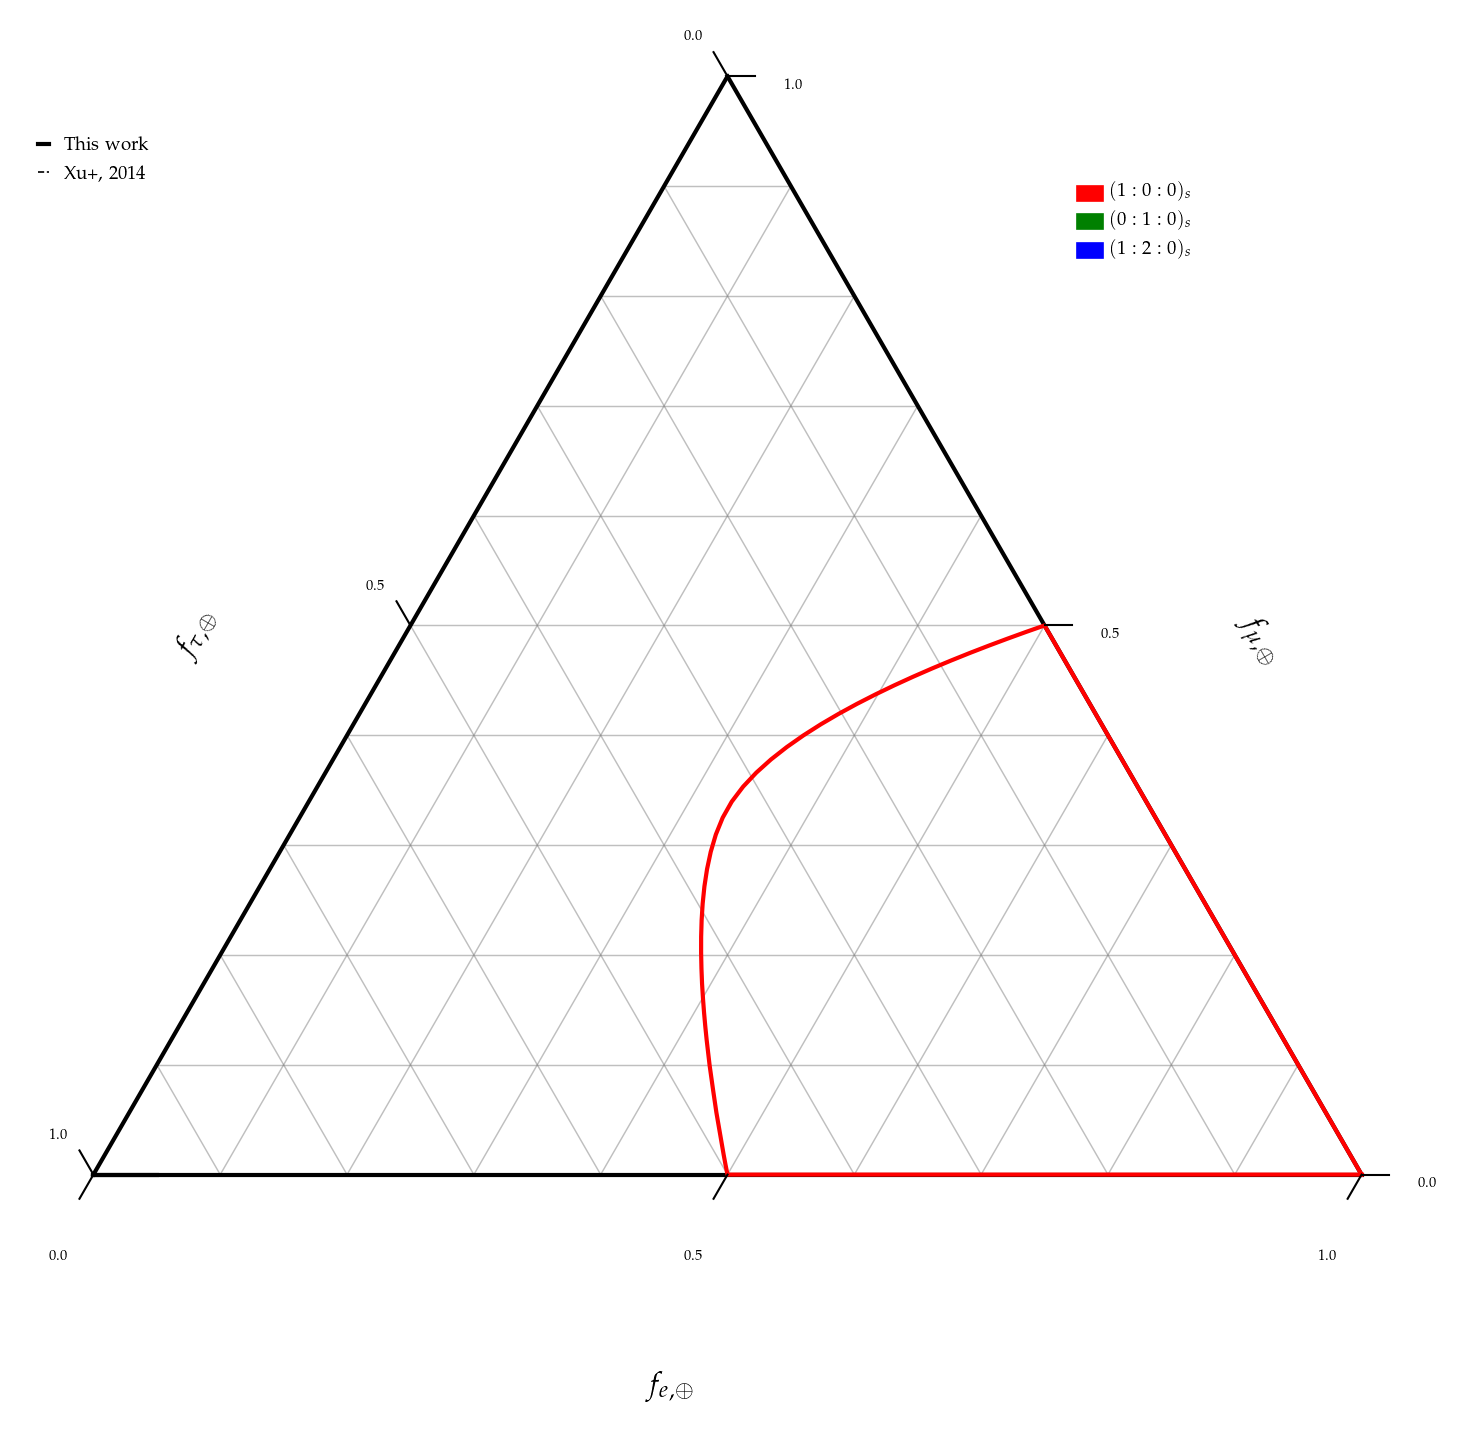

In [3]:
#### Boundary and Gridlines
scale = 20
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(6, 5.6)
figure.set_dpi(300)

plt.axis('off')

tax.gridlines(color="gray", multiple=0.1 * scale, linewidth=0.35, ls='-', alpha=0.5)

# Set Axis labels and Title
fontsize = 7.25
tax.left_axis_label(r'$f_{\tau,\oplus}$', fontsize=fontsize, offset=0.175)
tax.right_axis_label(r'$f_{\mu,\oplus}$', fontsize=fontsize, offset=0.175)
tax.bottom_axis_label(r'$f_{e,\oplus}$', fontsize=fontsize, offset=0.175)

tax.boundary(linewidth=1.0)

fe = 3.0/3.
fmu = 0.0/3.
A4 = []

steps = 360
for chi in arange(0.0,2*np.pi,2*np.pi/(1.*steps)) :
    
    L = []
    
    for dchi in arange(-np.pi/2.+2.*np.pi/(1.*steps),np.pi/2.,2.*np.pi/(1.*steps)) :
        omega = chi+dchi
        x = (1.-fe-2.*fmu)*np.sin(omega)
        y = (1.-2.*fe-fmu)*np.cos(omega)
        z = (fmu-fe)*(np.cos(omega)-np.sin(omega))
    
        B = [0.0,(x+y+z)/3.,x/2.,y/2.,z/2.]
       
        if x**2 >= (y-z)**2/9. :
            B.append(((3.*x+y+z)**2-4.*y*z)/24./x)
        if y**2 >= (z-x)**2/9. :
            B.append(((3.*y+z+x)**2-4.*z*x)/24./y)
        if z**2 >= (x-y)**2/9. :
            B.append(((3.*z+x+y)**2-4.*x*y)/24./z)

        L.append(max(B)/np.cos(dchi))
    
    A4.append([fe+np.cos(chi)*min(L),fmu+np.sin(chi)*min(L)])
   
A4 = np.array(A4)        
tax.plot(A4*scale, linewidth=1, marker=None, color='red', linestyle='solid')

r = plt.plot(np.array([[-1000, -1000], [-1000, -1000]]) * scale, linewidth=4., marker=None, color = 'red', label='$(1:0:0)_s$')
g = plt.plot(np.array([[-1000, -1000], [-1000, -1000]]) * scale, linewidth=4., marker=None, color = 'green', label='$(0:1:0)_s$')
b = plt.plot(np.array([[-1000, -1000], [-1000, -1000]]) * scale, linewidth=4., marker=None, color = 'blue', label='$(1:2:0)_s$')

black = plt.plot(np.array([[-1000, 0], [-1000, 0]]) * scale, linewidth=1., marker=None, color='black', label='This work')
dotted = plt.plot(np.array([[-1000, 0], [-1000, 0]]) * scale, linewidth=0.4, marker=None, color='black', linestyle='dashed', label='Xu+, 2014')

handles1 = [black[0], dotted[0]]
handles2 = [r[0], g[0], b[0]]

tax.clear_matplotlib_ticks() # Remove default Matplotlib Axes

tax.set_axis_limits({'b': [0., 1.], 'l': [0., 1.], 'r': [0., 1.]})

tax.get_ticks_from_axis_limits(multiple=10.)
tax.set_custom_ticks(fontsize=3.5, multiple=10., offset=0.022, linewidth=0.5, tick_formats= {'b': "%.1f", 'l': "%.1f", 'r': "%.1f"})

first_legend = plt.legend(handles=handles2, bbox_to_anchor=(0.75, 0.85), loc='center left', borderaxespad=0.,fancybox=True,framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=0.6, fontsize=4.5)
tax.ax.set_aspect('equal')

ax = plt.gca().add_artist(first_legend)

tax.legend(handles=handles1, bbox_to_anchor=(0, 0.90), loc='center left', borderaxespad=0.,fancybox=True,framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=0.6, fontsize=4.5)
tax.ax.set_aspect('equal')

#ternary.plt.tight_layout()
tax._redraw_labels()

ternary.plt.show()